In [4]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import convolution layer
from tensorflow.keras.layers import Conv2D
# import pooling layer
from tensorflow.keras.layers import MaxPooling2D

# import faltten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop

In [5]:
print(tf.__version__)
print(cv2.__version__)

2.9.1
4.6.0


In [12]:
image= cv2.imread(r"C:\Users\USER\Desktop\AI AND ML\project\AI_ML PROJECT\images\mona_7 - Copy.jpg")

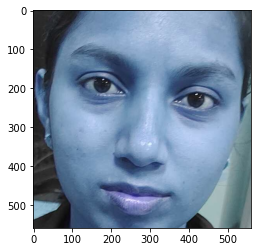

In [13]:
plt.imshow(image)

In [14]:
type(image)

numpy.ndarray

In [15]:
def preprocess(image):
    image= cv2.resize(image,(100,100))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return image

In [16]:
import os


In [17]:
pm = preprocess(image)

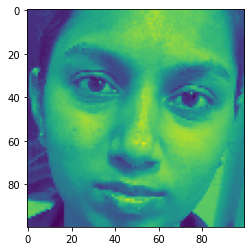

In [18]:
plt.imshow(pm)
plt.show()

In [19]:
import pickle

# Unpickle the file
with open(r"C:\Users\USER\Desktop\AI AND ML\project\AI_ML PROJECT\clean_data\images.p", "rb") as f:
    images = pickle.load(f)

with open(r"C:\Users\USER\Desktop\AI AND ML\project\AI_ML PROJECT\clean_data\labels.p", "rb") as f:
    labels = pickle.load(f) 

In [20]:
print(images.shape)
print(labels.shape)

(1119, 100, 100)
(1119,)


In [21]:
set(labels)

{'mona', 'priyanka', 'sanjyoti', 'subhasish'}

In [22]:
sum(labels=='priyanka')

255

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [24]:
set(labels)

{0, 1, 2, 3}

In [25]:
le.inverse_transform([0])

array(['mona'], dtype='<U9')

In [26]:
n_persons = len(set(labels))
print("Number of persons: ", n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
    print(i, "-->", label_mapping[i])

Number of persons:  4
0 --> mona
1 --> priyanka
2 --> sanjyoti
3 --> subhasish


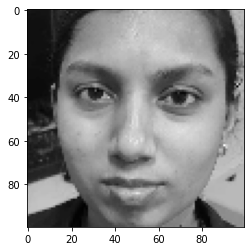

In [27]:
import matplotlib.pyplot as plt

plt.imshow(images[69], cmap=plt.get_cmap("gray"))
plt.show()

In [28]:
def preprocessing(img):
      img = cv2.equalizeHist(img)
      img = img.reshape(100, 100, 1)
      img = img/255
      return img

In [29]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (1119, 100, 100, 1)


In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
labels = to_categorical(labels)

In [32]:
images.shape

(1119, 100, 100, 1)

In [33]:
labels.shape

(1119, 4)

In [34]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape=(100, 100, 1), activation="relu"))
model.add(Conv2D(32, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(4, activation="softmax"))
model.compile(RMSprop(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                    

In [36]:
h=model.fit(images,labels,validation_split=0.2,batch_size=50,epochs=10,verbose=1)

Epoch 1/10
18/18 [==============================] - 22s 1s/step - loss: 0.7915 - accuracy: 0.7229 - val_loss: 1.0762 - val_accuracy: 0.4509
Epoch 2/10
18/18 [==============================] - 38s 2s/step - loss: 0.1626 - accuracy: 0.9721 - val_loss: 0.3204 - val_accuracy: 1.0000
Epoch 3/10
18/18 [==============================] - 37s 2s/step - loss: 0.0403 - accuracy: 0.9944 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 51s 3s/step - loss: 0.0400 - accuracy: 0.9866 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 22s 1s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 37s 2s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 36s 2s/step - loss: 0.0366 - accuracy: 0.9844 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 8/10
18/18 [==

In [37]:
#saving trained file
model.save(r"C:\Users\USER\Desktop\AI AND ML\project\AI_ML PROJECT\faceModel.h5")